## Problem Set:
1. Implementing Binary Search
2. 
3. 
4. 
5. 
6. 

## Comments
* Given the computation time for basic operation (governed by the physics of transistor), each algorithm involves certain number of steps and computational time. We are interested in how the computational time depends on different scales of the inputs. (essentially, it is the shape of a function).
* Given the memory requirement for a basic information unit, each algorithm involves certain requirement of the memory. We are interested in how the memory requirement depends on different scales of the inputs.
* <font, color ='Green'> In many case, there is a lower bound for different algorithms (usually within the same class). This is similar to the efficiency bound in estimation. However, one big difference is that if we can attain the lower bound in the algorithm case, not the estimation case, we can accelerate our civilization. Example: in *comparison-based* sorting algorithm, the lower bound is $O(n\log n)$, where $n$ is the length of the sequence. The lower bound is attained by the *merge sort* and the *quick sort* algorithms.<font>

### Comparing Different Orders

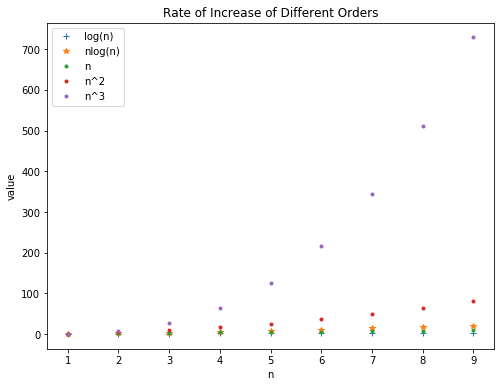

In [381]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
n_max = 10
step = n_max//10
n_grid = np.arange(1, n_max, step).astype(np.int64)

plt.figure(figsize = (8,6))
plt.plot(n_grid, np.log(n_grid), '+', label = 'log(n)')
plt.plot(n_grid, n_grid*np.log(n_grid), '*', label = 'nlog(n)')
plt.plot(n_grid, n_grid, '.', label = 'n')
plt.plot(n_grid, np.power(n_grid,2), '.', label = 'n^2')
plt.plot(n_grid, np.power(n_grid,3), '.', label = 'n^3')
plt.legend(loc=2)
plt.xlabel('n')
plt.ylabel('value')
plt.title('Rate of Increase of Different Orders')
plt.show()

## 1. Implementing Binary Search
* **Original Problem**: given a sorted strictly increasing integer sequence $a_0<a_1<\cdots<a_{n-1}$, and another sequence of integers $b_0,\cdots,b_{k-1}$. Search for each $b_j$ in the $a$ sequence and return its index, return $-1$ if $b_j$ is not in the $a$ sequence. 

* **My View**: 

* **Divide and Conquer**: Binary search uses divide and conquer to shrink the search area.
    
* **Difference between Linear and Binary Search**:
    * Linear search does not sort the search array, it is based on one by one comparison. The computational time is of order $O(n)$.
    * Binary search has a sorted search array, it is called "binary" since everytime we cut the search array and decide to go the left or right area for next step. It essentially reduces the scanning area and be more and more focused. Its power comes from the exponential. The computational time is of order $O(\log_2n)=O(\log n)$.

#### 1.1 Algorithms

In [264]:
import sys
import numpy as np

def binary_search_iterative(a, x):
    '''
    a: a sorted array, in increasing order
    '''
    l, r = 0, len(a)-1         # l: left, r: right, they are indexes of the start and end of the array
    while l <= r:              # in while loop, there is value initialization before the loop and value updating at the end
        m = (l + r)//2         # m: mid point index
        if x == a[m]:
            return(m)
        elif x < a[m]:
            r = m - 1
        else:
            l = m + 1
    return (-1)
# Asymptotic order: O(log(n))

def binary_search_recursive(a,x,l,r):
    '''
    a: a sorted array, in increasing order
    '''
    if l <= r:
        m = (l + r)//2
        if x == a[m]:
            return(m)
        elif x < a[m]:
            r = m-1
            return(binary_search_recursive(a,x,l,r))
        else:
            l = m+1
            return(binary_search_recursive(a,x,l,r))
    else:
        return (-1)
# Asymptotic order: O(log(n))

def linear_search(a, x):
    '''
    Functionality: search x in the a sequence and return its index
    a: array to be searched over
    x: the key which we search in a
    '''
    for i in range(len(a)):
        if a[i] == x:
            return i
    return (-1)
# Asymptotic order: O(n)

## Comment: If a is not unique or strictly increasing, then linear_search and binary_search can 
## output different result since linear_search gives out index of the first appearance.

#### 1.2 Test and Timing It
<font color ='green'>**Stress Test Guarantees that each launching point leads to the correct landing point for the map**<font>

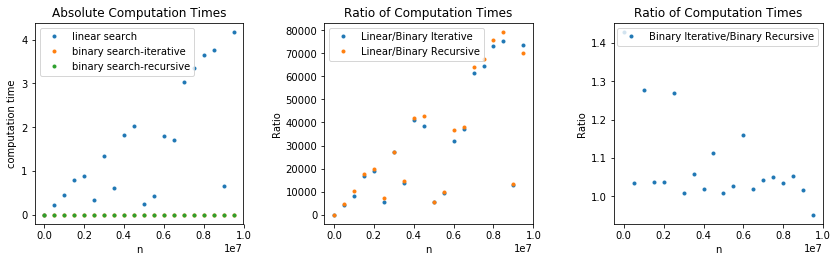

In [282]:
import timeit

result1 = []
result2 = []
result3 = []
time1 = []
time2 = []
time3 = []
n_max = 10000000
step = n_max//20
grid = np.arange(1, n_max, step)

for n in grid:
    a = np.random.randint(0, n, size = n)
    a = np.sort(a)
    a = np.unique(a)
    x = np.random.randint(0, n, size = 1)
    
    # Linear Search
    start_time = timeit.default_timer()
    result1.append(linear_search(a,x))
    time1.append(timeit.default_timer()-start_time)
    
    # Binary Search-Iterative
    start_time = timeit.default_timer()
    result2.append(binary_search_iterative(a,x))
    time2.append(timeit.default_timer()-start_time)
    
    # Binary Search-Recursive
    start_time = timeit.default_timer()
    result3.append(binary_search_recursive(a,x,0,len(a)-1))
    time3.append(timeit.default_timer()-start_time)
    
assert(np.mean(np.array(result1)==np.array(result2))==1)
assert(np.mean(np.array(result2)==np.array(result3))==1)

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (12,4))
plt.subplot(1,3,1)
plt.plot(grid,time1,'.',label='linear search')
plt.plot(grid,time2,'.',label='binary search-iterative')
plt.plot(grid,time3,'.',label='binary search-recursive')
plt.legend(loc=1)
plt.xlabel('n')
plt.ylabel('computation time')
plt.title('Absolute Computation Times')

ratio12 = np.array(time1)/np.array(time2)
ratio13 = np.array(time1)/np.array(time3)
ratio23 = np.array(time2)/np.array(time3)

plt.subplot(1,3,2)
plt.plot(grid,ratio12,'.',label = 'Linear/Binary Iterative')
plt.plot(grid,ratio13,'.',label = 'Linear/Binary Recursive')
plt.xlabel('n')
plt.ylabel('Ratio')
plt.title('Ratio of Computation Times')
plt.legend(loc=1)

plt.subplot(1,3,3)
plt.plot(grid,ratio23,'.',label = 'Binary Iterative/Binary Recursive')
plt.xlabel('n')
plt.ylabel('Ratio')
plt.title('Ratio of Computation Times')
plt.legend(loc=1)
plt.tight_layout(pad = 2, w_pad = 2, h_pad = 2)
plt.show()

## 2. Finding a Majority Element

* **Original Problem**: 
* **Placeholder Version of the Problem**:
* **My View**: 
* **Divide and Conquer**:

#### 2.1 Algorithms

#### 2.2 Stress Test and Time the Algorithm

## 3.  Improving Quick Sort

* **Problem**: Given a sequence of $n$ numbers $a_0,a_1,\cdots,a_n$ (can be repetitive), build a function that outputs a sorted sequence. 

* **Placeholder Version of the Problem**: 

* **My View**: 

* **Divide and Conquer**: 
        
* **Comment**: a visiualization of different sorting algorithms in different situations can be found at <https://www.toptal.com/developers/sorting-algorithms/>

#### 3.1 Algorithms

In [975]:
# Rank-based algorithms

import numpy as np
def sort_find_minimum(a):
    '''
    English: find the minimum of the original sequence by pairwise comparison and updating, put the minimum into a list and 
    remove it from the original array to obtain a new sequence, iterate this process.
    '''
    # Translate English into Code
    
    a = list(a)
    a_sorted = []
    
    while len(a) > 0:
        minimum = a[0]
        for i in range(len(a)):
            if a[i] < minimum:
                minimum = a[i]
        a_sorted.append(minimum)
        a.remove(minimum) # it removes the first apprearance in the list
    
    return(np.array(a_sorted))
# Asymptotic Order: O(n^2), where n = len(a)

def sort_selection(a):
    '''
    English: start from the 1st element, find the minimum and swap with the 1st element; start from the 2nd element, find the 
    minimum and swap with the 2nd element, iterate this process. It is essentially the same as sort_find_minimum
    '''
    # Translate English into Code
    
    for i in range(len(a)):
        k = i
        for j in range(i+1, len(a)):
            if a[j] < a[k]:                  # Comparison: unit cost c1
                k = j                        # Update index: unit cost c2
        a[i], a[k] = a[k], a[i]              # Update array: unit cost c3
    return (a)
# There are cost associated with comparison, update index in Layer 2, and cost associated with updating array in Layer 1.

#### Comments

**Cost of sort_selection()**: Let $n=len(a)$, $c_1$ be the unit cost for comparison in Layer 2 of sort_selection(), $c_2$ be the unit cost for index-updating in Layer 2 of sort_selection(), $c_3$ be the unit cost for swapping elements in Layer 1 of sort_selection(). Assuming the comparison cost and index-updating cost when $a[j]\ge a[k]$ to be the same those when $a[j]<a[k]$, then the cost for the i-th iteration of Layer 1 is $(c_1+c_2)(n-i)+c_3$. Total computation cost function is 

$$C(n)=\sum_{i=0}^{n-1}[(c_1+c_2)(n-i)+c_3]=\frac{c_1+c_2}{2}n(n+1)+c_3n=O(n^2),$$
where the parameters $c_j,j=1,2,3$ are controlled by the physical properties of the computer, such as CPU, which is in turn controled by the transistor and the design of the computer. This is where the quantum computing kicks in and **drastically** decreases these unit cost parameters. As a result, given that the asymptotic order of one existing algorithm does not change, but the actual cost function gets pushed toward the horizontal axis.

In [968]:
def sort_divide_merge(a):
    '''
    English: divide an array into roughly two array, sort each of the smaller array, and then merge the two sorted arrays by 
    selecting the greater of the two 1st elements and iterate.
    '''
    # Translate English into Code
    a = list(a)
    
    if len(a) > 2:
        m = len(a)//2
        a1 = sort_merge(a[:m])
        a2 = sort_merge(a[m:])
        
        a_sort = []
        while (len(a1) > 0 and len(a2) > 0):
            if a1[0] > a2[0]:
                a_sort.append(a2[0])
                a2.remove(a2[0])
            else:
                a_sort.append(a1[0])
                a1.remove(a1[0])
        if len(a1) == 0:
            a_sort.extend(a2)          # extend is used to append one list to another list
        else:
            a_sort.extend(a1)
        return(a_sort)
    
    elif len(a) == 2:
        if a[0] > a[1]:
            a_sort = [a[1], a[0]]
            return(a_sort)
        else:
            a_sort = a
            return(a_sort)
    else:
        a_sort = a
        return(a_sort)

# Asymptotic Order: O(nlog(n)), where n = len(a)

In [966]:
def sort_quick(a):
    less = []
    equal = []
    greater = []

    if len(a) > 1:
        _ = np.random.randint(0, len(a))
        a[0], a[_] = a[_], a[0]
        
        pivot = a[0]
        
        for _ in a:
            if _ < pivot:
                less.append(_)
            if _ == pivot:
                equal.append(_)
            if _ > pivot:
                greater.append(_)
        a_sort = sort(less) + equal + sort(greater)  
    else: 
        a_sort = a
    return (a_sort)


def sort_quick_complicated(a):
    '''
    English: 1. Divide the array into two parts with some pivot number, so that all the elements to the left (right) of the pivot number 
    are smaller (larger) than the pivot number; 2. Iterate the process on the left and right subarray. 
    
    In the process of dividing, it is similar to the sort_divide_merge(), in the process of merging, it is easier than 
    sort_divide_merge() since we do not need to compare the heads of two arrays and choose the smaller one.
    '''
    a = list(a)
        
    if len(a) > 2:   # the threshold is chosen to be 1, otherwise, it does not work if a contains two numbers in decreasing order
        _ = np.random.randint(0, len(a))
        #print('_:',_)
        a[0], a[_] = a[_], a[0]
        pivot = a[0]
        
        j = 0                        # j is the index of the pivot number and it will be updated       
        for i in range(j+1, len(a)):
            if a[i] <= pivot:
                j += 1               # Everytime there is a new smaller one, the boundary is pushed towards right by 1
                a[i], a[j] = a[j], a[i]
        
        a[j], a[0] = a[0], a[j]
        #print('j:',j,'a:',a)        
        a1 = sort_quick(a[:j])
        a2 = sort_quick(a[j+1:])
        a_sort = a1 + [a[j]] + a2
        
    elif len(a) == 2:
        if a[0] > a[1]:
            a_sort = [a[1],a[0]]
        else:
            a_sort = a
    else:
        a_sort = a
    return (a_sort)   
# The visualization of sort_quick_complicated() is quite complicated, and the code will be too. In contrast, the visualization 
# of sort_quick() is much easier and straightforward.

### Summary from sort_merge(): Reasons for Success (<font, color ='Green'>**Success can be repeated, we need to summarize the placeholder for procedures towards success !!!** </font>)

* (1) For others' code, do not follow line by line and the details, but summarize different layers of structure and associated ideas, then rewrite it myself.
* (2) For complicated code, use one concrete example (*small but generalizable*) to help write a portion of the code in somehow concrete code language, then refine it with an abstract code language and a more general version
* (3) For the recursively defined algorithm, during testing, try from small to large examples. This is because small examples involves fewer recursions and can better fit into the memory of human brain.

In [37]:
import sys
import numpy as np
import random

def partition3(a, l, r): # This is not correct
    a = list(a)
    tmp = a[l:r+1]   # Focus on a small area and then update
    #print('tmp',tmp)
    #print('tmp7',tmp[7])
    x = tmp[0]
    j = 0            # j is switching index for the element on the left
    count_left = 0
    count_pivot = 0
    
    #for i in range(1, len(tmp)):
    i = 1
    while len(tmp)>0:
        #print('i',i)
        if tmp[i] < x:
            j += 1      
            #print('j',j)
            count_left += 1           # After iteration, count_left is the number of values smaller than the pivot value 
            tmp[i], tmp[j] = tmp[j], tmp[i]
            #print('tmp',tmp)
            i += 1
        if tmp[i] == x:
            count_pivot += 1          # Ater iteration, count equals frequency of the pivot value
            del tmp[i]
        
    tmp[0], tmp[j] = tmp[j], tmp[0]
    
    tmp = tmp[:count_left]+count_pivot*[x]+tmp[count_left:]
    a[l:r+1] = tmp                    # Updating small portion of a
    #a[l:r+1] = a[count_pivot:(count_pivot+count_left)]+a[:count_pivot]+a[count_pivot+count_left:]        
    j1 = count_left           # Index of the 1st pivot element
    j2 = j1+count_pivot-1     # Index of the last pivot element
    #print('a',a)
    return (j1, j2)


def partition2(a, l, r):
    x = a[l]
    j = l
    for i in range(l + 1, r + 1):
        if a[i] <= x:
            j += 1
            print(i,j)
            a[i], a[j] = a[j], a[i]
    a[l], a[j] = a[j], a[l]
    return j


def randomized_quick_sort(a, l, r):
    '''
    l and r: index of the left and right endpoints
    '''
    if l >= r:
        return
    k = l # random.randint(l, r)
    a[l], a[k] = a[k], a[l]
    #use partition3
    j1, j2 = partition3(a, l, r)
    randomized_quick_sort(a, l, j1 - 1)
    randomized_quick_sort(a, j2 + 1, r)

#### 3.2 Stress Test and Time the Algorithms

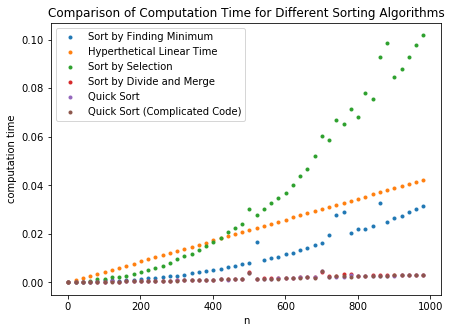

In [1226]:
import timeit
time_find_minimum = []
time_selection = []
time_divide_merge = []
time_quick = []
time_quick_complicated = []
n_max = 1000
step = n_max//50
n_grid = np.arange(1,n_max,step)
for n in n_grid:
    a = np.random.randint(0,n,n)
    #print(n)
    #print(a)
    start_time = timeit.default_timer()
    result1 = sort_find_minimum(a)
    time_find_minimum.append(timeit.default_timer()-start_time)
    
    start_time = timeit.default_timer()
    result2 = sort_selection(a)
    time_selection.append(timeit.default_timer()-start_time)
    
    assert(np.mean(np.array(result1)==np.array(result2))==1)
    
    start_time = timeit.default_timer()
    result3 = sort_divide_merge(a)
    time_divide_merge.append(timeit.default_timer()-start_time)
    
    assert(np.mean(np.array(result2)==np.array(result3))==1)
    
    start_time = timeit.default_timer()
    result4 = sort_quick(a)
    time_quick.append(timeit.default_timer()-start_time)
    
    assert(np.mean(np.array(result3)==np.array(result4))==1)
    
    start_time = timeit.default_timer()
    result5 = sort_quick_complicated(a)
    time_quick_complicated.append(timeit.default_timer()-start_time)
    
    assert(np.mean(np.array(result4)==np.array(result5))==1)
    
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (7,5))
plt.plot(n_grid, time_find_minimum, '.', label='Sort by Finding Minimum')
plt.plot(n_grid, n_grid*time_find_minimum[0], '.', label='Hyperthetical Linear Time')
plt.plot(n_grid, time_selection, '.', label='Sort by Selection')
plt.plot(n_grid, time_divide_merge, '.', label='Sort by Divide and Merge')
plt.plot(n_grid, time_quick, '.', label='Quick Sort')
plt.plot(n_grid, time_quick_complicated, '.', label='Quick Sort (Complicated Code)')
plt.legend()
plt.title('Comparison of Computation Time for Different Sorting Algorithms')
plt.xlabel('n')
plt.ylabel('computation time')
plt.show()

### Comments
* From the above graph, we know that although sort_find_minimum() and sort_selection() are asymptotically of the same order, they are of different computational time. This reason should lie in different unit cost associated with different basic operation.

## 4. Minimizing Number of Trips while Collecting Signatures

* **Original Problem**:
* **Placeholder Version of the Problem**:
* **My View**:
* **Divide and Conquer**

#### 4.1 Algorithms

#### 4.2 Stress Test and Time the Algorithms